In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/data.csv')

Data Preprocessing

In [ ]:
print(df.describe().T)

                         count          mean  ...           75%           max
id                       569.0  3.037183e+07  ...  8.813129e+06  9.113205e+08
radius_mean              569.0  1.412729e+01  ...  1.578000e+01  2.811000e+01
texture_mean             569.0  1.928965e+01  ...  2.180000e+01  3.928000e+01
perimeter_mean           569.0  9.196903e+01  ...  1.041000e+02  1.885000e+02
area_mean                569.0  6.548891e+02  ...  7.827000e+02  2.501000e+03
smoothness_mean          569.0  9.636028e-02  ...  1.053000e-01  1.634000e-01
compactness_mean         569.0  1.043410e-01  ...  1.304000e-01  3.454000e-01
concavity_mean           569.0  8.879932e-02  ...  1.307000e-01  4.268000e-01
concave points_mean      569.0  4.891915e-02  ...  7.400000e-02  2.012000e-01
symmetry_mean            569.0  1.811619e-01  ...  1.957000e-01  3.040000e-01
fractal_dimension_mean   569.0  6.279761e-02  ...  6.612000e-02  9.744000e-02
radius_se                569.0  4.051721e-01  ...  4.789000e-01 

In [ ]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.rename(columns = {'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

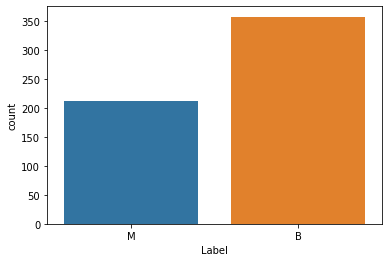

In [ ]:
sns.countplot(x='Label',data=df)

In [ ]:
print('Distribution of data',df['Label'].value_counts())
y = df['Label'].values
print('Labels before encoding are:',np.unique(y))
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(y)
print('Labels after encoding are',np.unique(Y))

Distribution of data B    357
M    212
Name: Label, dtype: int64
Labels before encoding are: ['B' 'M']
Labels after encoding are [0 1]


In [ ]:
print(df.describe().T)

                         count          mean  ...           75%           max
id                       569.0  3.037183e+07  ...  8.813129e+06  9.113205e+08
radius_mean              569.0  1.412729e+01  ...  1.578000e+01  2.811000e+01
texture_mean             569.0  1.928965e+01  ...  2.180000e+01  3.928000e+01
perimeter_mean           569.0  9.196903e+01  ...  1.041000e+02  1.885000e+02
area_mean                569.0  6.548891e+02  ...  7.827000e+02  2.501000e+03
smoothness_mean          569.0  9.636028e-02  ...  1.053000e-01  1.634000e-01
compactness_mean         569.0  1.043410e-01  ...  1.304000e-01  3.454000e-01
concavity_mean           569.0  8.879932e-02  ...  1.307000e-01  4.268000e-01
concave points_mean      569.0  4.891915e-02  ...  7.400000e-02  2.012000e-01
symmetry_mean            569.0  1.811619e-01  ...  1.957000e-01  3.040000e-01
fractal_dimension_mean   569.0  6.279761e-02  ...  6.612000e-02  9.744000e-02
radius_se                569.0  4.051721e-01  ...  4.789000e-01 

In [ ]:
df.columns

Index(['id', 'Label', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
#Defining the independent variables, Drop labels and ID and normalize other data
X = df.drop(labels = ['Label','id','Unnamed: 32'],axis = 1)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.25)

In [ ]:
print('Shape Of Training Data is:',x_train.shape)
print('Shape of Testing Data is',x_test.shape)

Shape Of Training Data is: (426, 30)
Shape of Testing Data is (143, 30)


In [ ]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-1.488033,-1.082004,-1.366651,-1.168611,0.104593,0.924055,-0.034392,-0.521016,0.329977,3.827870,0.436815,-0.661607,0.149470,-0.327761,3.389811,3.811771,0.822834,0.951175,0.589374,6.859624,-1.353531,-1.629614,-1.331463,-1.048038,-0.511503,-0.067845,-0.617866,-1.016318,-1.046309,1.355149
1,2.874993,0.211845,3.057588,3.145893,3.440117,3.455973,4.243589,3.927930,3.079138,0.846648,3.983947,3.452962,3.435978,4.238914,5.429894,4.056567,3.179967,1.042013,3.018209,2.299805,2.019222,-0.274754,2.193393,2.096165,1.632072,1.082296,1.478172,1.677876,0.519703,-0.213673
2,-0.317327,0.681912,-0.410215,-0.365436,-2.408970,-1.610136,-1.094848,-1.214049,-1.521051,-1.482475,-0.837597,-0.135810,-0.873758,-0.571980,-1.207709,-1.298098,-1.004615,-1.613035,-0.534235,-1.069167,-0.469910,0.544350,-0.568350,-0.477771,-2.240829,-1.399158,-1.267561,-1.604080,-0.979980,-1.413980
3,0.869853,0.647006,0.808603,0.777609,0.064029,-0.272730,0.022733,0.421754,0.202194,-0.991984,0.054600,-0.868260,-0.023296,0.111833,-0.849361,-0.749934,-0.378445,-0.311627,-1.102093,-0.839682,1.099776,0.594832,0.990045,0.976374,1.027137,0.015490,0.559926,1.275894,0.509996,-0.456949
4,0.872693,1.217138,0.915698,0.780737,0.764297,1.490705,1.009428,0.787254,0.421251,0.293783,0.669609,-0.319059,0.415301,0.640974,-0.407009,1.714795,0.352336,-0.085345,-0.638362,0.947178,1.460100,1.326001,1.320668,1.407063,1.145493,3.086136,1.844223,1.146468,0.666921,2.768252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.580158,-0.749234,0.590295,0.380003,0.173624,0.747807,-0.279842,0.130282,0.651260,0.414279,-0.832544,-1.320576,-0.750991,-0.559439,-0.843694,-0.411243,-0.410607,0.026580,-0.145573,-0.037411,0.145126,-1.064546,0.173913,-0.033546,-0.388763,0.004675,-0.291634,0.159785,0.408076,0.313331
422,-0.675185,0.207191,-0.653649,-0.668618,0.892395,0.184948,-0.255736,-0.297641,0.662213,0.245584,0.348751,0.863894,0.524703,-0.043939,0.797373,-0.079818,0.324152,-0.044792,1.625806,0.478903,-0.610726,0.086759,-0.546606,-0.591860,0.150419,-0.413905,-0.367435,-0.540791,0.432343,-0.225865
423,0.892574,1.426574,0.841556,0.779031,-0.928729,0.124303,0.396746,0.217723,-1.258183,-1.237230,0.378346,0.838493,0.206398,0.396975,0.356021,0.983760,0.581119,0.912245,-0.557239,-0.021146,0.851277,1.593064,0.760694,0.709172,0.492339,1.004687,1.110202,0.902842,-0.648335,-0.249694
424,0.455192,-1.863899,0.446130,0.262542,0.565034,0.484381,0.380424,0.340245,-0.100834,-0.029431,-0.874050,-1.505458,-0.852967,-0.582321,-0.335673,-0.406772,0.048618,-0.182670,-1.064558,-0.582092,0.153409,-1.868995,0.156042,-0.046203,0.952616,0.277579,0.615098,0.465839,-0.556121,-0.118358


# **Machine Learning Models**

**Logistic Regression Algorithm**

Accuracy score using Logistic Regression : 0.986013986013986


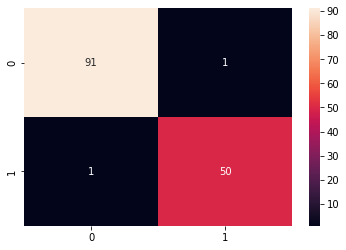

In [ ]:
#Using Logistic Regression Algorithm 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
Y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm,annot=True)
print('Accuracy score using Logistic Regression :',accuracy_score(y_test, Y_pred))

KNeighborsClassifier Method

Accuracy score using KNeighborsClassifier Method : 0.9790209790209791


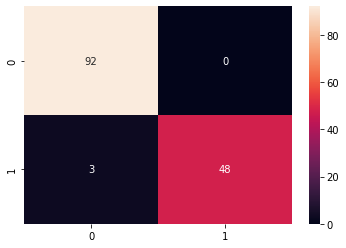

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
Y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm,annot=True)
print('Accuracy score using KNeighborsClassifier Method :',accuracy_score(y_test, Y_pred))

**Support Vector Machine Algorithm**

Accuracy score using Support Vector Machine Algorithm : 0.9790209790209791


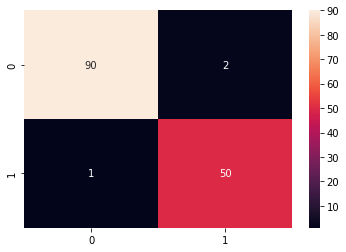

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
Y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm,annot=True)
print('Accuracy score using Support Vector Machine Algorithm :',accuracy_score(y_test, Y_pred))

**Kernel SVM Algorithm**

Accuracy score using Kernel SVM Algorithm : 0.9790209790209791


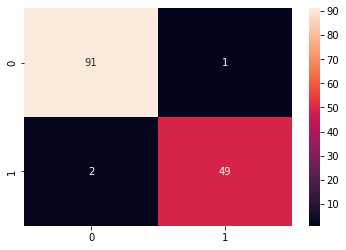

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
Y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm,annot=True)
print('Accuracy score using Kernel SVM Algorithm :',accuracy_score(y_test, Y_pred))

**Naïve Bayes Algorithm**

Accuracy score using Naïve Bayes Algorithm : 0.9230769230769231


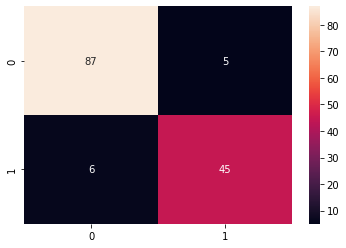

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
Y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm,annot=True)
print('Accuracy score using Naïve Bayes Algorithm :',accuracy_score(y_test, Y_pred))

**DecisionTreeClassifier**

Accuracy score using DecisionTreeClassifier : 0.9090909090909091


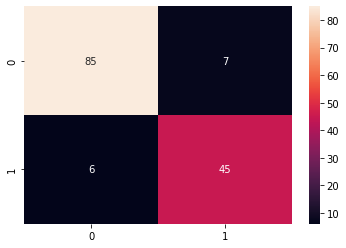

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
Y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm,annot=True)
print('Accuracy score using DecisionTreeClassifier :',accuracy_score(y_test, Y_pred))

**RandomForestClassifier**

Accuracy score using RandomForestClassifier : 0.972027972027972


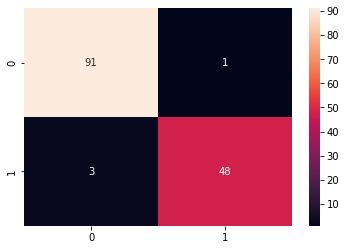

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
Y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm,annot=True)
print('Accuracy score using RandomForestClassifier :',accuracy_score(y_test, Y_pred))

# **Deep Learning**

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout


In [ ]:
model = Sequential()
model.add(Dense(16,input_dim=30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose = 2,epochs = 100,batch_size = 64)

Epoch 1/100
7/7 - 3s - loss: 0.6408 - accuracy: 0.6033 - val_loss: 0.5849 - val_accuracy: 0.7273 - 3s/epoch - 402ms/step
Epoch 2/100
7/7 - 0s - loss: 0.5880 - accuracy: 0.6831 - val_loss: 0.5222 - val_accuracy: 0.8322 - 38ms/epoch - 5ms/step
Epoch 3/100
7/7 - 0s - loss: 0.5187 - accuracy: 0.8122 - val_loss: 0.4661 - val_accuracy: 0.9231 - 36ms/epoch - 5ms/step
Epoch 4/100
7/7 - 0s - loss: 0.4565 - accuracy: 0.8685 - val_loss: 0.4149 - val_accuracy: 0.9441 - 35ms/epoch - 5ms/step
Epoch 5/100
7/7 - 0s - loss: 0.4161 - accuracy: 0.9085 - val_loss: 0.3671 - val_accuracy: 0.9650 - 35ms/epoch - 5ms/step
Epoch 6/100
7/7 - 0s - loss: 0.3807 - accuracy: 0.9038 - val_loss: 0.3228 - val_accuracy: 0.9720 - 36ms/epoch - 5ms/step
Epoch 7/100
7/7 - 0s - loss: 0.3139 - accuracy: 0.9366 - val_loss: 0.2827 - val_accuracy: 0.9720 - 39ms/epoch - 6ms/step
Epoch 8/100
7/7 - 0s - loss: 0.2864 - accuracy: 0.9460 - val_loss: 0.2479 - val_accuracy: 0.9720 - 43ms/epoch - 6ms/step
Epoch 9/100
7/7 - 0s - loss: 0.2

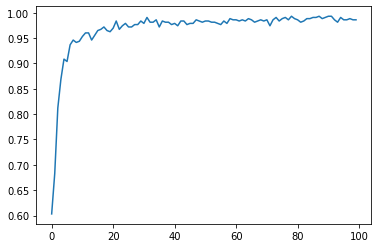

In [ ]:
plt.plot(history.history['accuracy'])

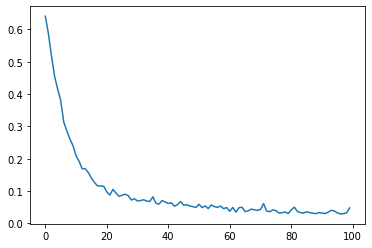

In [ ]:
plt.plot(history.history['loss'])

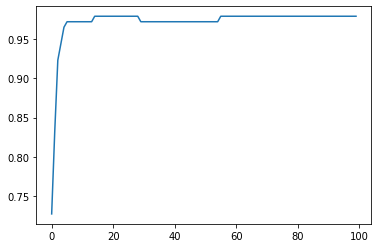

In [ ]:
plt.plot(history.history['val_accuracy'])

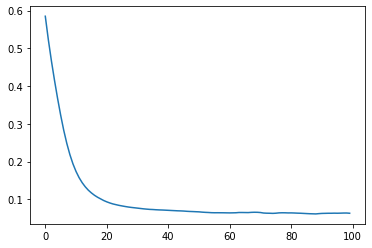

In [ ]:
plt.plot(history.history['val_loss'])